# Gender Analysis on NYPD Complaints
#### By: Kent Utama, Lauren Sidarto

# Summary of Findings

### Introduction
The report below uses the "Civilian Complaints Against New York City Police Officers" dataset, published by the New York City’s Civilian Complaint Review Board. The dataset contains more than 12,000 civilian complaints filed against New York City police officers; to be specific, these are records of closed cases for every police officer still on the force as of late June 2020. 

The dataset contains details such as:
- The officers' details (shield number, rank, race, etc.)
- The complainants' details (age, race, gender, etc.)
- Category describing the alleged misconduct,
- The Civilian Complaint Review Board's (CCRB) conclusion on whether officers' conducts violated NYPD rules

There has been a recent upswing of movements supporting feminism over recent years, and it is still a pertinent issue covered on the news. With this information in mind, we would like to investigate whether or not the Civilian Complaint Review Board (CCRB) is biased towards men. That is, if complaints from women have a lower success rate (substantiated or exonerated) than that of men's. 

Following this, we would then build a **classifier** where we get a few features and predict whether the outcome of a complaint ends up succesful (substantiated or exonerated) or not (unsubstantiated). We would like to find out how our classifier would emphasis weight on the features, especially gender. Lastly, we also tested on whether our model is fair or not on males vs females. In order to do this, we used **precision** (i.e. true positives) as our evaluation metric since it allows us to know how much of the actually successful outcomes were we able to correctly predict. 

### Assessment of Missingness
The data was first cleaned; NaN values were investigated, and other values, like negative ages or 'Unknown' values, were replaced with NaN. This is necessary, since our analysis of missingness and the imputation of NaN values in our hypothesis test will overlook anything that is not NaN.

The missingness test found that the missingness of the complainant's gender was dependent on FADO/complaint type, and independent of officer's precinct. Both these tests used the total variation difference (TVD) as a test statistic, since two categorical variables were being comparaed.

### Hypothesis Test
The hypothesis test, was conducted under the following assumptions: 
$$ H_0: C_W = C_M $$
$$  H_A: C_W < C_M $$

The null hypothesis is that the CCRB shows no bias between the complaints of men and women, the alternative hypothesis is that the CCRB is more favourable to men's complaints, and a significance level of 0.05 was used. The TVD was also utilized as the test statistic, because of similar reasoning as above (it was also found that the distribution of successful and failed complaints between the groups are similar, so it was not necessary to use the Kolmogorov-Smirnov statistic). The hypothesis test resulted in a rejection of the null hypothesis--i.e. men are treated more favourably by the CCRB--but when only data from 2019 was taken into account, the test failed to reject the null hypothesis, indicating that in more recent years, it is possible that the CCRB is less biased.


### Baseline Model
Since we find out that men have an overall advantage with the complaints, we would now proceed with our model:

For the baseline model, we picked features that we believe are relevant to our investigation (e.g. complainant ethnicity/gender, officer ethnicity/gender, and even the year the complaint was received). We excluded factors that we believe is irrelevant such as name, complaint id, etc.

Our investigation leads to a result of ~61% accuracy when we do a train-test split of 15% test size. To achieve this, we used the features `year_received`, `month_received`, `complainant_ethnicity`, `complainant_gender`, `fado_type`, `mos_ethnicity`, and `mos_gender` based on domain knowledge. We turned the board disposition into a binary variable where:
- exonerated or substantiated is represented with a 1 (success), and
- unsubstantiated is represented as a 0 (failure).

For this model we ran a logistic regression on 7 features (5 nominal, 2 quantitative). For the nominal data, we simply one-hot encoded them so that they can be fit into a classifier model.

Our model has an accuracy of around 61%--this is not too good for a machine learning model, but it may have good social implications. An accuracy of 61% indicates the strength of the pattern is simply slightly better than the chances for a coin flip. This means that the features we picked do not necessarily determine what a complaint's outcome is. This is a good thing; if an outcome can be determined accurately most of the time only by looking at the complainant and police officer's features (ethnicity, gender, etc.), it would raise a lot of red flags about the equity of the justice system in New York City.

### Final Model
For the final model, we added and engineered a couple more features:
- `rank_incident` which describes the officer's rank at the time of complaint
- `allegation` which describes the allegation made by the complainant
We then ordinally encoded `rank_incident`, one-hot encoded `month_received` (since months should not necessarily play a quantitatively decisive role in this classifier).

These features are helpful because we want to find out more about bias within the New York City Police Department (e.g. whether months/holiday seasons such as Christmas make them more lenient, or if an officer's rank play a big role in the success of a complaint). And lastly, accounting for `fado_type` in the engineered feature `allegation` allows the model to have more specific data about the type of 'offence' made by an officer, which in turn allows us to determine whether or not offence type is determinant in a complaint's outcome. 

We chose the same machine learning model as before, which is logistic regression, since it will allow us to analyze the coefficients of each feature and how it affects outcomes. 

A GridSearchCV is also run to determine the covergence point of the logistic regression model, which then was fixed as one of its parameters. The best model was picked (with only parameter `max_iter = 300`), fitted, trained, and tested accordingly.  

All of these changes lead to, an improved accuracy of 68%, which is decent but still has great social implications. We are still unable to look at a complainant's and/or officer's physical features and decide whether the officer should be substantiated/exonerated. 

In fact, it gives us a better idea of the offences that officers truly commit against civilians, which we found to be abuse of authority through usage of excessive force. This can be deduced from the 6% increase in our probability by including `allegation`, where most of the contributing coefficients/factors belong to this column.

We also found that contradictory to what we found earlier, in our model men have around a 2% lesser chance than women at being successful in their complaints, ignoring other features.

Furthermore, we also found out that the biggest determinant for a successful complaint is if there was force involved (e.g. pepper spray, gun pointed, etc.). 


### Fairness Evaluation
For the fairness evaluation, we want to find out whether or not the ~2% decreased chance for males' complaints to be successful is the truth or if it is because our model is biased towards women.


To achieve this, we will be using precision as our parity measure since it gives us the proportion of actual successful complaints that were successfuly predicted by our model. Hence, we are able to get the accuracy of our model in predicting successful complaints. 

We do this by running a permutation test with the following parameters:

- $H_0$: The model is fair; the precision for the two subsets are roughly the same
- $H_a$: The model is unfair; the precision for the female subset is higher than the male subset
- A significance level of p = 0.05 (5%).

After running the permutation test, we got a p-value of ~0.90, which means that we do not reject the null; our precision for the two groups are similar. This is great because males have more successful complaints than failed complaints while females have almost an equal number of successful and failed complaints. Despite this slight "imbalance", which would cause our model to predict more false positives for males, it still has the same precision as the prediction for females. Hence, we can conclude that throughout history, the board tends to be biased towards men, yet our model has more weight on women's complaints being successful than men's. This could be due to the "rapidly" increasing success chances for women.

### Conclusion
To conclude the project, we found that women have an advantage when it comes to filing complaints towards the NYPD. Based on our model, this advantage is up by 2% when compared to men's. Although our findings show that men and women are not treated differently in 2019, the history regarding gender roles cannot be denied. Thus, a future project that can be derived from this is a model strictly made on some years instead of overtime. This can even be extended to a time series analysis to show the true change in favoritism/sexism in the NYPD over the past century. 

We found that society has made big steps toward fairness for both men and women. Although this disparity can still be felt in a lot of aspects in life, this project is a mere sign that this disparity is slowly diminishing. 

# Code
### Cleaning and EDA

We begin by importing the necessary packages:

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import math
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin

The code block below describes the process of reading a .csv dataset into a dataframe using the `read_csv()` function; the first few rows are shown using `head()`.

In [157]:
allegations = pd.read_csv('allegations.csv')
allegations.head() #using .head() function to display the first few rows

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


To get a better idea of what the data contains, the code block below uses the `dtype` function to show the data type of each of the columns, as well as a full list of the columns.

In [158]:
allegations.dtypes

unique_mos_id                 int64
first_name                   object
last_name                    object
command_now                  object
shield_no                     int64
complaint_id                  int64
month_received                int64
year_received                 int64
month_closed                  int64
year_closed                   int64
command_at_incident          object
rank_abbrev_incident         object
rank_abbrev_now              object
rank_now                     object
rank_incident                object
mos_ethnicity                object
mos_gender                   object
mos_age_incident              int64
complainant_ethnicity        object
complainant_gender           object
complainant_age_incident    float64
fado_type                    object
allegation                   object
precinct                    float64
contact_reason               object
outcome_description          object
board_disposition            object
dtype: object

**Data Cleaning**

Before analysis, the dataset must be cleaned. The code block below lists all the numerical columns with NaN values in them, as well as displays the first few rows with NaN values in them:

In [159]:
print(allegations.columns[allegations.isnull().sum() >0])
allegations[allegations.isna().any(axis=1)].head()[['complainant_ethnicity','complainant_gender','contact_reason']]

Index(['command_at_incident', 'complainant_ethnicity', 'complainant_gender',
       'complainant_age_incident', 'allegation', 'precinct', 'contact_reason',
       'outcome_description'],
      dtype='object')


,complainant_ethnicity,complainant_gender,contact_reason
4,NaN,NaN,Report-dispute
59,Black,Male,NaN
60,Black,Male,NaN
61,Black,Male,NaN
62,Black,Male,NaN


We also notice that some values in the non-numerical columns are "Unknown".

In [160]:
allegations.iloc[271:273]['complainant_ethnicity']

271    Unknown
272    Unknown
Name: complainant_ethnicity, dtype: object

For missingness analysis, these need to be replaced with NaN values; the code block below achieves that with `.replace()`, with the argument `regex=True`.

In [161]:
allegations = allegations.replace(r'Unknown', np.nan, regex=True)

There may be other invalid entries other than NaN values. First, we check the numerical columns for negative values using `np.where`, and find and dislpay these rows.

In [162]:
cols = allegations.columns[(allegations.dtypes == int)|(allegations.dtypes == float)] #get columns with int or float values
allegations.iloc[np.where(allegations[cols]<0)[0]][cols]

,complainant_age_incident,precinct
4393,-1.0,122.0
6981,-1.0,77.0
10274,-4301.0,72.0
17241,-1.0,67.0
17243,-1.0,67.0
23560,-1.0,40.0


In [163]:
allegations.iloc[np.where(allegations[cols]<0)[0]]['complainant_age_incident']

4393       -1.0
6981       -1.0
10274   -4301.0
17241      -1.0
17243      -1.0
23560      -1.0
Name: complainant_age_incident, dtype: float64

We see that the column `complainant_age_incident`, which denotes the age of the complainant at the time of the incident, has negative ages. This likely indicates that the age was either not reported, or reported wrong. The code block below replaces these values with `NaN`, so that they do not skew summary statistics (e.g. the mean).

In [164]:
allegations['complainant_age_incident'][allegations['complainant_age_incident'] < 0] = np.NaN
allegations.iloc[[4393,6981,10274,17241,17243,23560]]['complainant_age_incident'] #shows that the values have been replaced

4393    NaN
6981    NaN
10274   NaN
17241   NaN
17243   NaN
23560   NaN
Name: complainant_age_incident, dtype: float64

**Univariate Analysis**

Finally, we display some summary statistics--mean, standard deviation, minimum value, and maximum value--for each of the columns, using the `describe()` function. 

In [165]:
summary = allegations.describe().loc[['mean','std','min','max']]
summary

,unique_mos_id,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
mean,18169.912495,6451.608819,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.641906,64.365213
std,9566.316896,7945.641596,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,12.206667,31.451592
min,2.000000,0.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,0.000000,0.000000
max,36374.000000,31977.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


We also plot the distribution of some of the variables.

`month_received` and `month_closed` can be grouped into 12 bins, one for each month. The function `subplots()` is used to display graphs side-by-side. March sees the most amount of complaints filed, and June sees the most amount of complaints closed.

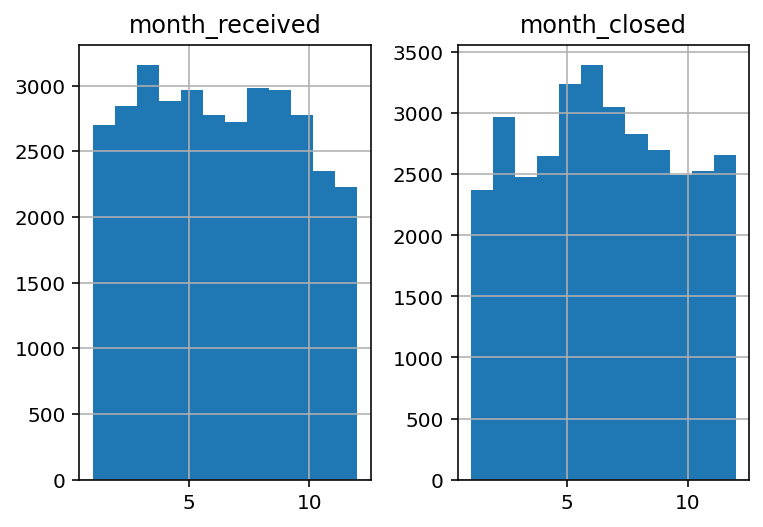

In [166]:
fig, axes = plt.subplots(1, 2)
allegations.hist('month_received',bins=12,ax=axes[0])
allegations.hist('month_closed',bins=12,ax=axes[1])
plt.show()

We can also plot the distributions of `mos_age_incident` and `complainant_age` together, since they are also on the same scale. The range of members of service is much smaller than the range of complainants, but their means are around 32 years old, as consistent with the table above.

A boxplot is able to show the centrality and distribution of ages; the red line indicates the mean of each group, and circles indicate outliers. There is one outlier in complainant_age--a value around 100 years--but because this is still a valid age for a human, we decide to leave the data in.

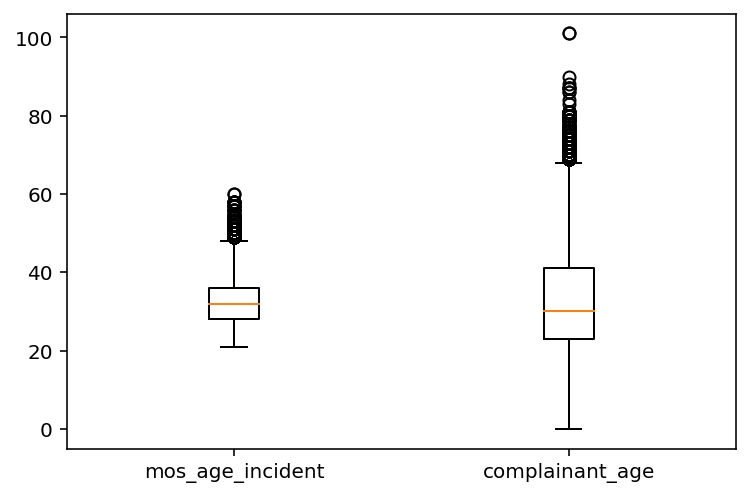

In [167]:
plt.boxplot(allegations[['mos_age_incident','complainant_age_incident']].dropna(), labels = ['mos_age_incident','complainant_age'])
plt.show()

**Bivariate Analysis**

This report aims to find out whether or not specific genders are more likely to receive favourable outcomes. We first select the relevant columns, `complainant_gender`,`outcome_description`, and `board_disposition`, and save them in a separate dataframe. The NaN values are dropped using `dropna()`, and the first few rows are displayed.

In [168]:
df = allegations[['complainant_gender', 'outcome_description','board_disposition']]
df = df.dropna(subset=['complainant_gender','outcome_description'])
df.head()

,complainant_gender,outcome_description,board_disposition
0,Female,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,Male,Moving violation summons issued,Substantiated (Charges)
2,Male,Moving violation summons issued,Substantiated (Charges)
3,Male,No arrest made or summons issued,Substantiated (Charges)
5,Male,No arrest made or summons issued,Substantiated (Command Lvl Instructions)


Then, this data is reformatted into a pivot table, indexed by `complainant_gender`. The table counts (indiciated by the argument `aggfunc = 'count'`) the number of each outcome. A `Total Count` column is also added to display the sum of all counts row-wise.

For reference, the meanings of the outcomes are as follows: 
- Substantiated: "The alleged conduct occurred and it violated the rules. The NYPD can choose to ignore those recommendations. It has discretion over what, if any, discipline is imposed."

- Exonerated: "The alleged conduct occurred but did not violate the NYPD’s rules, which often give officers significant discretion over use of force."
- Unsubstantiated: "The CCRB has fully investigated but could not affirmatively conclude both that the conduct occurred and that it broke the rules."

For the sake of simplicity, we consider both "Substantiated" and "Exonerated" as successful, and "Unsubstantiated" as failed.

In [169]:
outcomes = pd.pivot_table(df, values = 'outcome_description',index ='complainant_gender', columns='board_disposition',  aggfunc='count')
outcomes['Total Count'] = outcomes.sum(axis=1)
outcomes

board_disposition,Exonerated,Substantiated (Charges),Substantiated (Command Discipline A),Substantiated (Command Discipline B),Substantiated (Command Discipline),Substantiated (Command Lvl Instructions),Substantiated (Formalized Training),Substantiated (Instructions),Substantiated (No Recommendations),Unsubstantiated,Total Count
complainant_gender,,,,,,,,,,,
Female,1409.0,362.0,115.0,112.0,110.0,88.0,180.0,47.0,9.0,2561.0,4993.0
Gender non-conforming,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0
Male,6567.0,2944.0,752.0,600.0,600.0,317.0,713.0,171.0,50.0,11327.0,24041.0
Not described,21.0,NaN,4.0,1.0,NaN,3.0,6.0,NaN,NaN,22.0,57.0
Transman (FTM),NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0
Transwoman (MTF),4.0,8.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,20.0


All of the columns that denote the "Substantiated" results are also summed into their own column for convenience. A `Total Count` row is also added to display the sum of all counts column-wise.

In [170]:
outcomes['Substantiated (Total)'] = outcomes[outcomes.columns[outcomes.columns.str.contains('ed \(')]].sum(axis=1)
outcomes.append(pd.Series(outcomes.sum(axis=0),name='Total Count'))

board_disposition,Exonerated,Substantiated (Charges),Substantiated (Command Discipline A),Substantiated (Command Discipline B),Substantiated (Command Discipline),Substantiated (Command Lvl Instructions),Substantiated (Formalized Training),Substantiated (Instructions),Substantiated (No Recommendations),Unsubstantiated,Total Count,Substantiated (Total)
complainant_gender,,,,,,,,,,,,
Female,1409.0,362.0,115.0,112.0,110.0,88.0,180.0,47.0,9.0,2561.0,4993.0,1023.0
Gender non-conforming,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0
Male,6567.0,2944.0,752.0,600.0,600.0,317.0,713.0,171.0,50.0,11327.0,24041.0,6147.0
Not described,21.0,NaN,4.0,1.0,NaN,3.0,6.0,NaN,NaN,22.0,57.0,14.0
Transman (FTM),NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,2.0
Transwoman (MTF),4.0,8.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,20.0,11.0
Total Count,8001.0,3314.0,872.0,715.0,710.0,410.0,901.0,218.0,59.0,13918.0,29118.0,7199.0


We can also calculate the percentage that each value makes up for each outcome.
We now know that, for example, around 81% of all rejected (unsubstantiated) complaints are  filed by men, but also that 82% of all complaints are filed by men.

In [171]:
round(outcomes.div(outcomes.sum(axis=0),axis=1)*100,2)

board_disposition,Exonerated,Substantiated (Charges),Substantiated (Command Discipline A),Substantiated (Command Discipline B),Substantiated (Command Discipline),Substantiated (Command Lvl Instructions),Substantiated (Formalized Training),Substantiated (Instructions),Substantiated (No Recommendations),Unsubstantiated,Total Count,Substantiated (Total)
complainant_gender,,,,,,,,,,,,
Female,17.61,10.92,13.19,15.66,15.49,21.46,19.98,21.56,15.25,18.40,17.15,14.21
Gender non-conforming,NaN,NaN,NaN,NaN,NaN,0.49,NaN,NaN,NaN,NaN,0.01,0.03
Male,82.08,88.84,86.24,83.92,84.51,77.32,79.13,78.44,84.75,81.38,82.56,85.39
Not described,0.26,NaN,0.46,0.14,NaN,0.73,0.67,NaN,NaN,0.16,0.20,0.19
Transman (FTM),NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,0.02,0.02,0.03
Transwoman (MTF),0.05,0.24,0.11,NaN,NaN,NaN,0.22,NaN,NaN,0.04,0.07,0.15


Likewise, below is a pivot table that describes the percentage of each outcome, grouped by gender.
For example, 51.29% of women had their complaints fail, while 47.12% of men had their complaints fail.

In [172]:
orig = outcomes.drop('Substantiated (Total)',axis=1).drop('Total Count',axis=1)
orig = round(orig.div(orig.sum(axis=1), axis=0) * 100, 2) #convert to %
orig['Substantiated (Total)'] = orig[orig.columns[orig.columns.str.contains('ed \(')]].sum(axis=1) #add Substantiated (Total) back
orig

board_disposition,Exonerated,Substantiated (Charges),Substantiated (Command Discipline A),Substantiated (Command Discipline B),Substantiated (Command Discipline),Substantiated (Command Lvl Instructions),Substantiated (Formalized Training),Substantiated (Instructions),Substantiated (No Recommendations),Unsubstantiated,Substantiated (Total)
complainant_gender,,,,,,,,,,,
Female,28.22,7.25,2.30,2.24,2.2,1.76,3.61,0.94,0.18,51.29,20.48
Gender non-conforming,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,100.00
Male,27.32,12.25,3.13,2.50,2.5,1.32,2.97,0.71,0.21,47.12,25.59
Not described,36.84,NaN,7.02,1.75,NaN,5.26,10.53,NaN,NaN,38.60,24.56
Transman (FTM),NaN,NaN,NaN,40.00,NaN,NaN,NaN,NaN,NaN,60.00,40.00
Transwoman (MTF),20.00,40.00,5.00,NaN,NaN,NaN,10.00,NaN,NaN,25.00,55.00


We also use the `groupby()` function to show the overall breakdown of outcomes. Lines 2-4 in the code block below calculate the sum of all of the "Substantiated" charges, and saves, as well as displays, the count as "Substantiated (Total)".

In [173]:
grp = df.groupby('board_disposition').size()
temp = pd.Series(grp)
temp['Substantiated (Total)'] = grp.loc[grp.index.str.contains("ated \(")].sum()
temp.sort_values(ascending=False)

board_disposition
Unsubstantiated                             13918
Exonerated                                   8001
Substantiated (Total)                        7199
Substantiated (Charges)                      3314
Substantiated (Formalized Training)           901
Substantiated (Command Discipline A)          872
Substantiated (Command Discipline B)          715
Substantiated (Command Discipline)            710
Substantiated (Command Lvl Instructions)      410
Substantiated (Instructions)                  218
Substantiated (No Recommendations)             59
dtype: int64

The code block below plots the distribution of Male and Female outcomes next to each other.

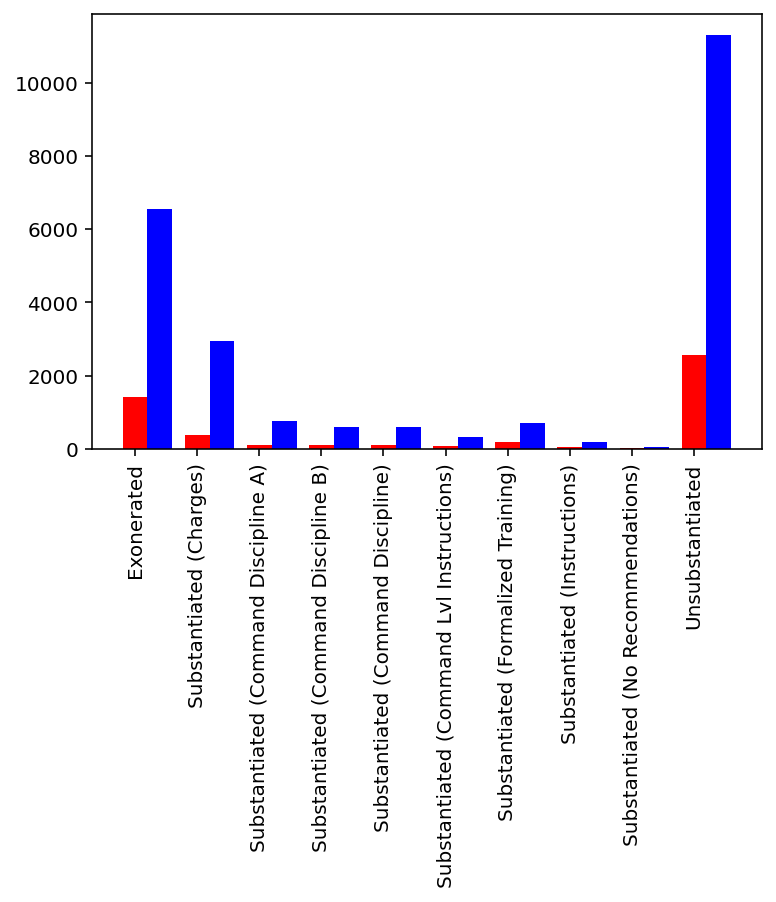

In [174]:
f = outcomes.drop(['Total Count','Substantiated (Total)'],axis=1).loc["Female"]
m = outcomes.drop(['Total Count','Substantiated (Total)'],axis=1).loc["Male"]
data = [f.to_list(),
  m.to_list()]

X = np.arange(10)
plt.bar(X + 0, data[0], color = 'r', width = 0.4)
plt.bar(X + 0.4, data[1], color = 'b', width = 0.4)

plt.xticks(X, f.index.to_list(),rotation=90)

plt.show()

At first glance it seems like these two samples may be drawn from the same distribution, i.e. men's and women's complaints receive unbiased treatment from the CCRB, but further testing is needed to confirm.

### Assessment of Missingness

We observe that around 13% of the filled-in genders are missing/have NaN values.

In [175]:
(str)(round(allegations['complainant_gender'].isna().sum() / len(allegations), 2)*100) + "%"

'13.0%'

 We would like to investigate if this missingness depends on:

1. The category of complaints that was made (FADO type). This allows us to investigate if a certain allegation category is related to a person's gender being missing (potentially due to bias). 
2. The precinct where the allegation was received. Under the assumption that complainants self-report gender, gender missingness would theoretically be independent of precinct.

#### 1. Missing Gender vs FADO Type
To achieve this, we run a hypothesis test under the following assumptions:
- Null hypothesis: The missingnness in the gender column is missing completely at random.
- Alternative hypothesis: The missingness in the gender column is dependent on FADO Type.
- A significance level of 5% (0.05).

An `isnull` column is created using the `isnull()` function, that uses `True` to denote a NaN value, and `False` to denote no missing value. Then, the `groupby()` function is used on column `isnull` to calculate the proportion of each type of FADO that is, or is not, null. This is thenn displayed in a dataframe for convenience:

In [176]:
#gender vs fado_type
allegations["isnull"] = allegations["complainant_gender"].isnull()

split = allegations.groupby(["isnull", "fado_type"]).count()["unique_mos_id"]#[False, "Abuse of Authority"]#.index
table = split.reset_index().pivot_table(index = "isnull", columns = "fado_type", values = "unique_mos_id")
total = (table.iloc[0]+table.iloc[1])
table.iloc[0] = table.iloc[0]/total
table.iloc[1] = table.iloc[1]/total
table

fado_type,Abuse of Authority,Discourtesy,Force,Offensive Language
isnull,,,,
False,0.857678,0.911054,0.895888,0.87251
True,0.142322,0.088946,0.104112,0.12749


Since the `isnull` column contains only True/False values, it is a binary categorical variable. We are looking at groups denoted by 2 genders, which is also a binary categorical variable.
This implies the usage of the total variation distance (TVD) as our test statistic, which mesures the sum of the absolute difference between the True/False proportions for each group. The TVD is best suited to comparing two categorical distributions that are similar in shape (as the bar graph in the previous section shows).

In [177]:
stat = table.diff().abs().iloc[1].sum()/2
stat

1.537129856709892

The test statistic is 1.537.

Now, a permutation test is used to generate 1000 samples of the test statistic. Each time, the `isnull` column is shuffled (this is saved into another column `random`, so that the original values are not overridden), the test statistic is calculated, and the test statistic is saved into `lst`.

In [178]:
lst = []
for _ in range(1000):
    allegations["random"] = allegations["isnull"].sample(frac = 1).reset_index(drop = True)
    split = allegations.groupby(["random", "fado_type"]).count()["unique_mos_id"]#[False, "Abuse of Authority"]#.index
    table = split.reset_index().pivot_table(index = "random", columns = "fado_type", values = "unique_mos_id")
    total = (table.iloc[0]+table.iloc[1])
    table.iloc[0] = table.iloc[0]/total
    table.iloc[1] = table.iloc[1]/total
    lst.append(table.diff().abs().iloc[1].sum()/2)

Below is the distribution of test statistics generated by the permutation test. The red line denotes the original test statistic.

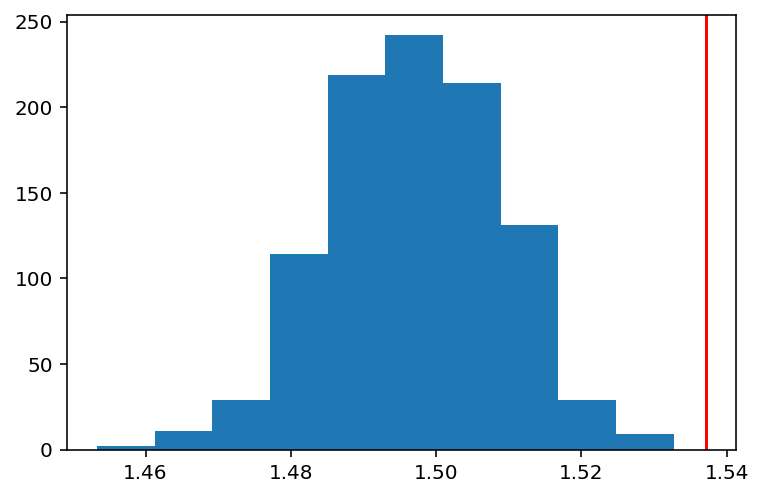

In [179]:
plt.hist(lst)
plt.axvline(stat, color='r')
plt.show()

 The p-value measures the probability of generating a value more extreme than our test statistic, i.e. the area under the curve and to the right of the line.

In [180]:
print("P-value:", np.count_nonzero(pd.Series(lst) >= stat) / len(lst))

P-value: 0.0


 Our significance value is 5%. The p-value of 0 is less than 0.05, so we can reject the null hypothesis in favour of the alternative. We may conclude that the missingness in the `complainant_gender` column is dependent on FADO type.
 
 ### 2. Missing Gender vs Precinct
 
 The same test is used to determine the dependency of gender to precinct. We run another hypothesis test under the following assumptions:
- Null hypothesis: The missingnness in the gender column is missing completely at random.
- Alternative hypothesis: The missingness in the gender column is dependent on precinct.
- A significance level of 5% (0.05).
 
 A table of null vs. non-null proportions is created for each precinct.

In [181]:
#gender vs year
allegations["isnull"] = allegations["complainant_gender"].isnull()
allegations["random"] = allegations["isnull"].sample(frac = 1).reset_index(drop = True)

split = allegations.groupby(["isnull", "precinct"]).count()["unique_mos_id"]#[False, "Abuse of Authority"]#.index
table = split.reset_index().pivot_table(index = "isnull", columns = "precinct", values = "unique_mos_id")
table = table.fillna(0)
total = (table.iloc[0]+table.iloc[1])
table.iloc[0] = table.iloc[0]/total
table.iloc[1] = table.iloc[1]/total
table

precinct,0.0,1.0,5.0,6.0,7.0,9.0,10.0,13.0,14.0,17.0,...,111.0,112.0,113.0,114.0,115.0,120.0,121.0,122.0,123.0,1000.0
isnull,,,,,,,,,,,,,,,,,,,,,
False,0.095238,0.954023,0.95625,0.937143,0.859729,0.887218,0.921162,0.967105,0.880342,0.947368,...,0.891892,0.941176,0.880682,0.831579,0.885714,0.900474,0.945355,0.915966,0.901786,1.0
True,0.904762,0.045977,0.04375,0.062857,0.140271,0.112782,0.078838,0.032895,0.119658,0.052632,...,0.108108,0.058824,0.119318,0.168421,0.114286,0.099526,0.054645,0.084034,0.098214,0.0


We still use the TVD as our test statistic, because the precints, though denoted by numbers, is a categorical variable. To be specific, there are 79 precincts (found by running the following: `len(table.columns)`).

The TVD is calculated by taking the sum of the absolute value of the differences for each group.

In [182]:
tvd = table.diff().abs().iloc[1].sum()/2
tvd

29.894100123618415

Anohter permutation test with 1000 iterations is run, the distribution is plotted, and the p-value displayed.

p-value:  0.059


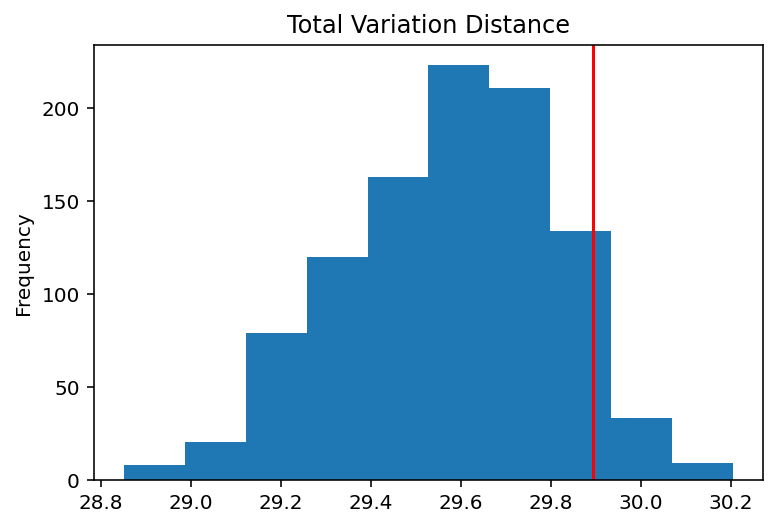

In [183]:
lst = []
for _ in range(1000):
    allegations["isnull"] = allegations["complainant_gender"].isnull()
    allegations["random"] = allegations["isnull"].sample(frac = 1).reset_index(drop = True)

    split = allegations.groupby(["random", "precinct"]).count()["unique_mos_id"]#[False, "Abuse of Authority"]#.index
    table = split.reset_index().pivot_table(index = "random", columns = "precinct", values = "unique_mos_id")
    table = table.fillna(0)
    total = (table.iloc[0]+table.iloc[1])
    table.iloc[0] = table.iloc[0]/total
    table.iloc[1] = table.iloc[1]/total
    lst.append(table.diff().abs().iloc[1].sum()/2)

pd.Series(lst).plot(kind = 'hist', title = "Total Variation Distance")
plt.axvline(tvd, color='r')
print("p-value: ", np.count_nonzero(pd.Series(lst) >= tvd)/len(lst))


The p-value is greater than the significance level of 0.05, so we cannot reject the null hypothesis. The missingness of gender is likely not dependent on precinct.


### Conclusion of Missingness

Assumptions:
1. The complainant are the ones who filled in the information, meaning that if their gender/ethnicity is missing, this is due to them leaving it blank.
2. Every precinct is a valid precinct.

The conclusions at the 5% significance level are summarized as follows:
1. The complainant gender's missingness dependent on the FADO/complaint type, and
2. The complainant gender is independent of the precinct of the officers that were being complained about.

This indicates that the kind of complaint against an officer may affect a complainant's decision in leaving gender empty. It's possible, for example, that a person would feel like their complaint is less likely to succeed if they provide their gender.

The code block below calculates the number of each allegation type filed under the "Offensive Language" category. The top 2 most common allegations are related to race and gender. If an officer's reported offensive language was in regards to the complainant's gender, it's also possible that the complainant felt like they didn't need to report their gender, or chose to exclude it due to emotional/personal reasons.

In [184]:
allegations[allegations["fado_type"] == "Offensive Language"]["allegation"].value_counts()

Race                   307
Gender                 115
Ethnicity               84
Sexual orientation      78
Black                   56
Other                   48
Physical disability     15
Religion                14
Other - Ethnic Slur     11
Hispanic                 9
White                    8
Gender Identity          4
Jewish                   2
Other Asian              1
Oriental                 1
Name: allegation, dtype: int64

### Hypothesis Test

Now, we will investigate our main objective, which is to find out whether women's complaints are less successful than men. To do this, we will once again perform a permutation test with TVD as its test statistic. Thus, whether board disposition is dependent on gender.

$ H_0: C_W = C_M$

$  H_A: C_W < C_M $

As mentioned earlier, there are three outcomes to a board disposition:
1. "Substantiated": the alleged conduct occured and it violated the rules
2. "Exonerated": the alleged conduct occured but did not violate NYPD rules
3. "Unsubstantiated": the CCRB could not affirmatively conclude both that the alleged conduct occured and that it broke the rules

To simplify these outcomes, we:
- classify both "substantiated" and "exonerated" as a successful complaint (represented as 1)
- classify "unsubstantiated" as unsuccessful (represented as 0)

#### Data Imputation
However, before we do so, we must first impute the missing genders. 

Despite the conclusions of the missingness analysis, we still cannot tell what the missing genders are, or which genders are more likely to be missing. The next best option is to coduct a probabilistic imputation--genders will be drawn from the existing proportion of males to females as to not skew the distribution's mean and variance. Furthermore, we will also exclude genders other than "male" and "female" from the permutation test to simplify our grasp of the men vs. women success rate.

In [185]:
#Successful vs unsuccessful
allegations["success"] = allegations["board_disposition"].str.split().str[0]
allegations["success"] = allegations["success"].replace({"Unsubstantiated" : 0, "Exonerated" : 1, "Substantiated" : 1})

#Imputing gender
ratio = allegations["complainant_gender"].value_counts()[["Male", "Female"]]
ratio = ratio/ratio.sum()
n = np.count_nonzero(allegations["complainant_gender"].isnull())
gens = pd.Series(np.random.choice(["Male", "Female"], size = n, p = ratio.values))
index = allegations[allegations["complainant_gender"].isnull()].index.tolist()
allegations["imputed_gender"] = allegations["complainant_gender"].fillna(pd.DataFrame([index, gens]).transpose().set_index(0, drop = True)[1])

allegations[["success", "imputed_gender"]].head()

,success,imputed_gender
0,1,Female
1,1,Male
2,1,Male
3,1,Male
4,1,Female


### Permutation Test
A permuation test can be carried out, under a significance level of 5% and the hypotheses stated earlier. The data is filtered and imputed, and a pivot table is created with the proportion of successes and failures for both genders.

In [186]:
tab = allegations[(allegations["imputed_gender"] == "Male") | (allegations["imputed_gender"] == "Female")].reset_index(drop = True)
pt = tab[["success", "imputed_gender"]].pivot_table(index = "success", columns = "imputed_gender", aggfunc = "size")
pt = pt/pt.sum()
pt

imputed_gender,Female,Male
success,,
0,0.497899,0.456208
1,0.502101,0.543792


Since we are using gender, a categorical variable, and success, a binary categorical variable, TVD may be used as a test statistic.

In [187]:
tvd = pt.diff().abs().iloc[1].sum()/2
tvd

0.04589301797200995

A permutation test is run with 1000 iterations, the p-value is calculated, and the distribution of generated test statistics are plotted.

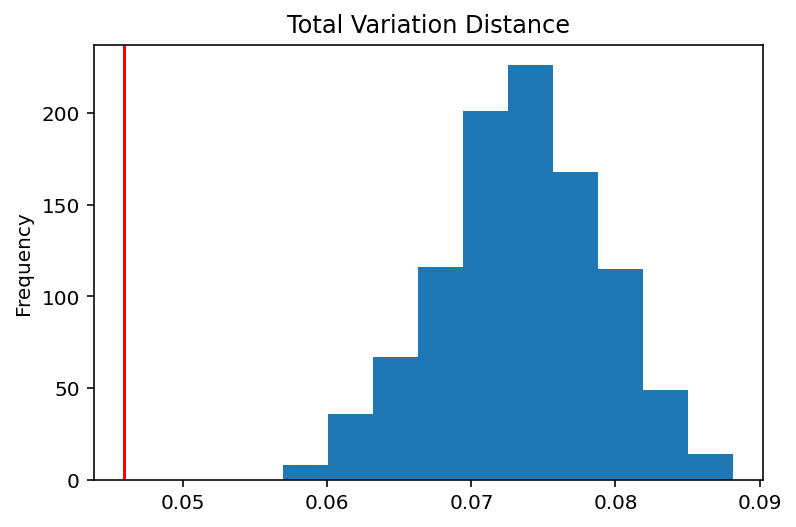

p-value:  0.0


In [188]:
lst = []
for _ in range(1000):
    tab["random"] = tab["complainant_gender"].sample(frac= 1).reset_index(drop = True)
    table = tab[["success", "random"]].pivot_table(index = "success", columns = "random", aggfunc = "size")
    table = table/table.sum()
    lst.append(table.diff().abs().iloc[1].sum()/2)

pd.Series(lst).plot(kind = 'hist', title = "Total Variation Distance")
plt.axvline(tvd, color='r')
plt.show()
print("p-value: ", np.count_nonzero(lst <= tvd)/len(lst))

The p-value is less than the significance level of 0.05, so the difference between the success rates of men and womer are statistically significant. The null hypothesis is rejected in favour of the alternative.

### Further Investigation: Same Comparison, Only  2019

To take the analysis further, we isolate all complaints from the year 2019 and run the same analysis. The code block below repeats the entire process, from imputation to permutation test. The hypotheses and level of significance remain the same:

$$ H_0: C_W = C_M$$
$$  H_A: C_W < C_M $$


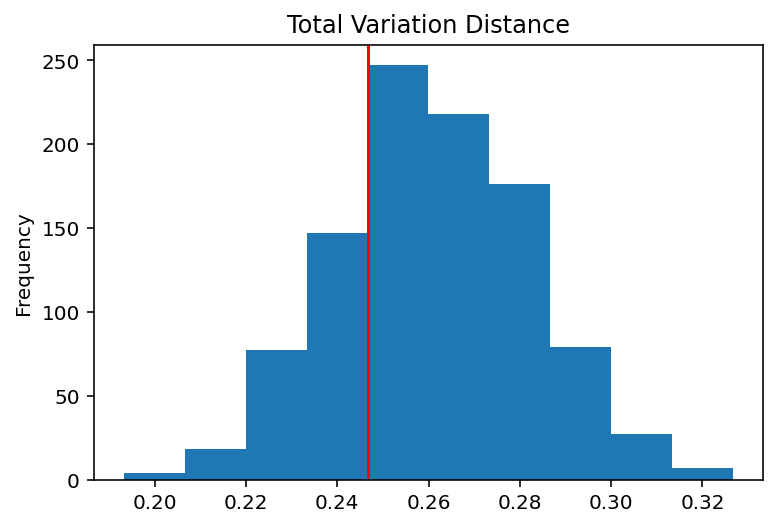

p-value:  0.247


In [189]:
tab = allegations[((allegations["imputed_gender"] == "Male") | (allegations["imputed_gender"] == "Female")) & (allegations["year_received"] == 2019)].reset_index(drop = True)
pt = tab[["success", "imputed_gender"]].pivot_table(index = "success", columns = "imputed_gender", aggfunc = "size")
pt = pt/pt.sum()
tvd = pt.diff().abs().iloc[1].sum()/2
tab[["success", "imputed_gender"]].head()

lst = []
for _ in range(1000):
    tab["random"] = tab["complainant_gender"].sample(frac= 1).reset_index(drop = True)
    table = tab[["success", "random"]].pivot_table(index = "success", columns = "random", aggfunc = "size")
    table = table/table.sum()
    lst.append(table.diff().abs().iloc[1].sum()/2)
    
pd.Series(lst).plot(kind = 'hist', title = "Total Variation Distance")
plt.axvline(tvd, color = 'r')
plt.show()
print("p-value: ", np.count_nonzero(lst <= tvd)/len(lst))

To our surprise, the p-value for 2019 is greater than the 0.05 significance level, and we cannot reject the null hypothesis. The success rate of women is not statistically different than the success rate of men.

### Conclusion of Exploration & Permutation Test

To conlcude our findings:
1. The complainant gender's missingness is dependent on FADO type
2. The CCRB is overall biased towards men when deciding whether a complaint is successful or not
3. However, in 2019, the CCRB was not biased towards men or women in deciding the outcome of complaints

Based on point 2, to some extent, we can make a claim that more of these missing genders are likely to be female than male. This is under the assumption that women do not feel as safe making complaints as compared to men. 

However, after we do further investigation, we find out that the CCRB's bias towards men cannot be affirmatively confirmed as we now have a p-value of around 0.32, which is well above our significance level of 5%. Though more time series analysis is needed to make definitive claims, it seems that more recent years may reflect that women more or less have an equal complaint success rate as that of men.

### Baseline Model

To begin, we create a baseline model with a generic set of features. First, the relevant columns are selected (`year_received`, `month_received`, `complainant_ethnicity`, `complainant_gender`, `fado_type`, `mos_ethnicity`, and `mos_gender`).

In [190]:
#Filtering columns
cols = ["year_received", "complainant_ethnicity", "imputed_gender", "fado_type", "mos_ethnicity",
"mos_gender", "month_closed", "success"]
df = allegations[cols].rename(columns = {"imputed_gender": "complainant_gender"})
df = df[((df["complainant_gender"] == "Male") | (df["complainant_gender"] == "Female"))]
df.head()

,year_received,complainant_ethnicity,complainant_gender,fado_type,mos_ethnicity,mos_gender,month_closed,success
0,2019,Black,Female,Abuse of Authority,Hispanic,M,5,1
1,2011,Black,Male,Discourtesy,White,M,8,1
2,2011,Black,Male,Offensive Language,White,M,8,1
3,2012,Black,Male,Abuse of Authority,White,M,9,1
4,2018,NaN,Female,Force,Hispanic,F,2,1


#### Imputing missingness
The dataframe still contains missing values in the `complainant_ethnicity` column, so these values must be imputed before fitting a model. These values are imputed by drawing from the distribution of ethnicities. This ensures that the mean and variance

Previously, some columns were also of type object. After the missing values have been imputed, we convert these into Strings. In order to fit a classification model, all values must be quantitative.

In [191]:
df.isnull().any()

year_received            False
complainant_ethnicity     True
complainant_gender       False
fado_type                False
mos_ethnicity            False
mos_gender               False
month_closed             False
success                  False
dtype: bool

In [192]:
#Imputing missing values
prop = df["complainant_ethnicity"].value_counts()
prop = prop/prop.sum()
n = np.count_nonzero(df["complainant_ethnicity"].isnull())
gen = pd.Series(np.random.choice(prop.index, size = n, p = prop.values))
index = df[df["complainant_ethnicity"].isnull()].index.tolist()

df["complainant_ethnicity"] = df["complainant_ethnicity"].fillna(pd.DataFrame([index, gen]).\
                                                                 transpose().set_index(0, drop = True)[1])

#dtype conversion
cat = ["complainant_gender", "complainant_ethnicity", "fado_type", "mos_ethnicity", "mos_gender"]
df[cat] = df[cat].astype(str)

In [193]:
display(df.drop("success", axis = 1).head()) 
df.isnull().any()

,year_received,complainant_ethnicity,complainant_gender,fado_type,mos_ethnicity,mos_gender,month_closed
0,2019,Black,Female,Abuse of Authority,Hispanic,M,5
1,2011,Black,Male,Discourtesy,White,M,8
2,2011,Black,Male,Offensive Language,White,M,8
3,2012,Black,Male,Abuse of Authority,White,M,9
4,2018,Asian,Female,Force,Hispanic,F,2


year_received            False
complainant_ethnicity    False
complainant_gender       False
fado_type                False
mos_ethnicity            False
mos_gender               False
month_closed             False
success                  False
dtype: bool

#### Pipeline 

Now, the model may be built. We begin by building an sklearn pipeline to one-hot encode the categorical columns in our selected features.

The data we have is split into a simple train and validate, with an 85-15 split. `y_train` and `y_test` contain just the `success` column from the dataframe, while `X_train` and `X_test` contain all other columns.

A LogisticRegression is chosen. Once fit on the training data, the model was fed the test data, and its predictions were compared to the original. The baseline model's accuraccy is around 61%.

In [194]:
#Pipeline
preproc = ColumnTransformer([('ohe', OneHotEncoder(), cat)], remainder = "passthrough")
pl = Pipeline([('preproc', preproc), ('classifier', LogisticRegression())])

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop("success", axis = 1), df["success"], test_size = 0.15)

#Fitting and prediction
pl.fit(X_train, y_train)
results = (pl.predict(X_test) - y_test).abs().value_counts()
print('accuracy: ', (round(results[0] *100/ results.sum(),2)), '%')

accuracy:  61.46 %


### Final Model

For the final model, we added and engineered a couple more features, including `rank_incident` which describes the officer's rank at the time of complaint, and `allegation` which describes the allegation made by the complainant. We then ordinal coded `rank_incident`, one-hot encoded `month_received` since months should not necessarily play a quantitatively decisive role in this classifier.

#### Pipeline

We begin by building an sklearn pipeline to one-hot encode the categorical columns in our selected features. However, for `rank_incident` we ordinal encoded it to see if an officer's rank play a role in determining a complainant's failure or success. We also one-hot encoded `month_closed` since the month of the complaint should not be a quantitative scale.

The data we have is split into a simple train and validate, with an 85-15 split. `y_train` and `y_test` contain just the `success` column from the dataframe, while `X_train` and `X_test` contain all other columns.

A LogisticRegression is chosen with a `max_iter` of 450 . Once fit on the training data, the model was fed the test data, and its predictions were compared to the original. The final model's accuraccy is around 68%.

In [195]:
df = pd.merge(df, allegations[["rank_incident", "allegation"]], left_index = True, right_index = True)
df = df[df["allegation"].isnull() == False]
cat = ["complainant_gender", "complainant_ethnicity", "fado_type", "mos_ethnicity", "mos_gender", "rank_incident", "allegation"]
df[cat] = df[cat].astype(str)
df.head()

,year_received,complainant_ethnicity,complainant_gender,fado_type,mos_ethnicity,mos_gender,month_closed,success,rank_incident,allegation
0,2019,Black,Female,Abuse of Authority,Hispanic,M,5,1,Police Officer,Failure to provide RTKA card
1,2011,Black,Male,Discourtesy,White,M,8,1,Police Officer,Action
2,2011,Black,Male,Offensive Language,White,M,8,1,Police Officer,Race
3,2012,Black,Male,Abuse of Authority,White,M,9,1,Police Officer,Question
4,2018,Asian,Female,Force,Hispanic,F,2,1,Police Officer,Physical force


In [196]:
#Pipeline
cat = ["complainant_ethnicity", "complainant_gender", "fado_type", "mos_ethnicity", "mos_gender", "allegation"]
dct = {"Police Officer": 0, "Detective": 1, "Sergeant": 2, "Lieutenant": 3, "Captain": 4, 
 "Deputy Inspector": 5, "Inspector": 6, "Chiefs and other ranks": 7}
month_dct = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

month_pl = Pipeline([('convert', FunctionTransformer(lambda x: pd.DataFrame(x.iloc[:, 0].apply(lambda y: month_dct[y])))),
                      ('ohe', OneHotEncoder())])
preproc = ColumnTransformer([('month', month_pl, ["month_closed"]),
                             ('rank', FunctionTransformer(lambda x: pd.DataFrame(x.iloc[:, 0].apply(lambda y: dct[y]))), ["rank_incident"]),
                             ('ohe', OneHotEncoder(handle_unknown = "ignore"), cat)], remainder = "passthrough")
pl = Pipeline([('preproc', preproc), ('classifier', LogisticRegression(max_iter = 450))])

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop("success", axis = 1), df["success"], test_size = 0.15)

#Fitting and prediction
pl.fit(X_train, y_train)
results = (pl.predict(X_test) == y_test).value_counts()
print('accuracy: ', (round(results[1] *100/ results.sum(),2)), '%')

accuracy:  68.86 %


#### Model Optimization: GridSearchCV

The `LogisticRegression()` model has a parameter of `max_iter`, which denotes the maximum iterations taken for the solvers to converge.
    In order to determine the best number for `max_iter`, GridSearchCV is run with `cv = 5`, to indicate a 5-layer Kfold cross-validation.
    
GridsearchCV tests out 14 different values for `max_iter`. This should be enough granularity, since we just need to find the general convergece point for the model; the parameter `max_iter` should not affect prediction accuracy.

In [197]:
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore') #hide the warnings caused by non-convergence (i.e. max_iter is too low)


params = {'max_iter':range(300,1000,50)}

clf = GridSearchCV(LogisticRegression(), params, cv = 5)

pl = Pipeline([('preproc', preproc), ('clf', clf)])

pl.fit(df.drop("success", axis = 1), df["success"])
(clf.best_params_["max_iter"], clf.best_score_)

(300, 0.6765543443135497)

The GridSearch found the connvergence point to be around `max_iter = 300`, with an $R^2$ value of 0.677. We can now fix this parameter in our model

Just to be sure, we evaluate this choice of parameter. The code block below plots a histogram of the model scores across all choices of `max_iter`. The $R^2$ values of the model fall around a very similar range, so it can be said that the choice of parameter does not impact the model's accuraccy--a good outcome.

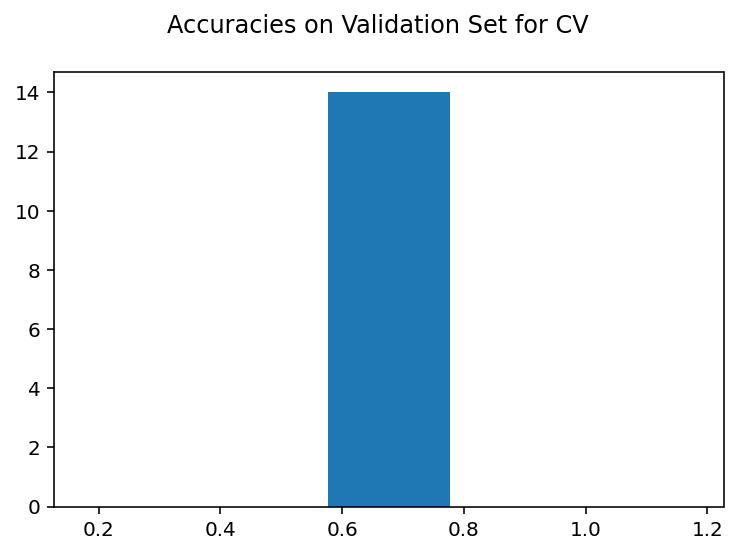

In [198]:
plt.hist(clf.cv_results_['mean_test_score'],bins=5)
plt.suptitle('Accuracies on Validation Set for CV')
plt.show()

We also plot the standard deviation of the model accuracies. High standard deviation indicates model performance is highly sensitive to how the training and testing data is being split.

Here, standard deviation is low--this means that the model is getting the same performance across other train-test splits--a favourable outcome. 

We can now redefine the LogisticRegression model to have a fixed `max_iter = 450`.

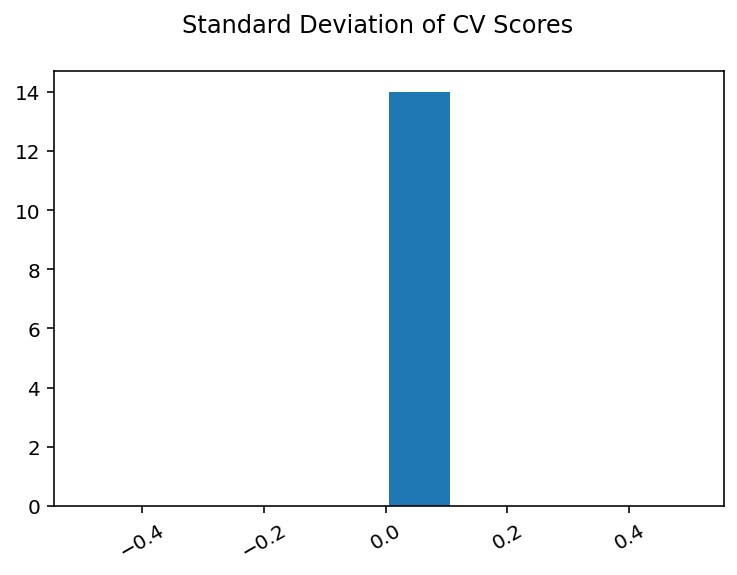

In [199]:
plt.hist(clf.cv_results_['std_test_score'],bins=10)
plt.suptitle('Standard Deviation of CV Scores')
plt.xticks(rotation=30)
plt.show()

#re-define the model
pl = Pipeline([('preproc', preproc), ('classifier', LogisticRegression(max_iter = 450))])

#### Model analysis

Now that we have the results of our logistic regression, we can find the coefficients of each feature. Below are the top 10 features that most positively influence the outcome of the complaint. We will also be interpreting the logistic regression coefficients.

In [200]:
pl.fit(df.drop("success", axis = 1), df["success"])
dum = pd.get_dummies(df[cat])
labels = list(month_dct.values()) + ["rank_incident"] + dum.columns.tolist() + ["year"]
coefs = pd.DataFrame(pl['classifier'].coef_[0], index = labels).sort_values(0, ascending = False)
coefs.head(10)

,0
allegation_Pepper spray,1.519692
allegation_Question and/or stop,1.370347
allegation_Gun Pointed,1.211526
allegation_Entry of Premises,1.140496
allegation_Retaliatory summons,1.099011
fado_type_Abuse of Authority,1.046300
allegation_Premises entered and/or searched,1.038570
allegation_Question,0.799014
allegation_Forcible Removal to Hospital,0.693732
allegation_Retaliatory arrest,0.613746


Following our initial goal if finding out whether gender plays a role in a complainant's success, we found out that ignoring every other feature, if the complainant was a male, they would have a success rate of ~49%. This success rate is ~51% for females. There is a ~2% difference between the two genders, which is not that negligible. This is contradictory with our initial findings where the Board is biased towards men.

The model's intercept is also 50%. This means that without any features, when predicting, it will almost randomly choose between successful and failed, which is ideal.

In [201]:
y = pl["classifier"].intercept_
print("Model intercept percentage:", math.exp(y)/(math.exp(y) + 1) * 100, "%")

y = pl["classifier"].intercept_ + coefs.loc["complainant_gender_Male"][0]
print("Expected success rate for a male complainant and no other features", math.exp(y)/(math.exp(y) + 1) * 100, "%")

y = pl["classifier"].intercept_ + coefs.loc["complainant_gender_Female"][0]
print("Expected success rate for a female complainant and no other features", math.exp(y)/(math.exp(y) + 1) * 100, "%")


Model intercept percentage: 50.21868671701919 %
Expected success rate for a male complainant and no other features 49.766685476492206 %
Expected success rate for a female complainant and no other features 50.88849793209177 %


If we were to look at the percentages for the top few features with the largest positive coefficients, we observe that a lot of these features include force or harrassment (e.g. pepper spray, gun pointed, abuse of authority, force, etc.). This means that a complainant has a ~70% probability of having a successful complaint if they experienced physical harrasment/force from an officer.

In [202]:
y = pl["classifier"].intercept_ + coefs.loc["allegation_Gun Pointed"][0]
print("Expected success rate for a complaint regarding Gun Pointed", math.exp(y)/(math.exp(y) + 1) * 100, "%")

y = pl["classifier"].intercept_ + coefs.loc["fado_type_Abuse of Authority"][0]
print("Expected success rate for a complaint regarding Abuse of Authority", math.exp(y)/(math.exp(y) + 1) * 100, "%")

Expected success rate for a complaint regarding Gun Pointed 77.21117654341285 %
Expected success rate for a complaint regarding Abuse of Authority 74.17430445103209 %


### Fairness Evaluation

To conclude whether or not women really have an advantage compared to men when it comes to their complaints, we do a fairness test among the two genders and how accurate our predictions are. 

Hence, we will perform our predictions on two different samples: one with just male complainants, and another with just female complainants. For this, we will be using precision as a parity measure since it tells us how much of our "successful" predictions are actually true. This allows us to get an idea of how "accurate" our model is in predicting success among actually successful complaints.

#### Precision for Women
The results are displayed in a table. `0` indicates fail, and `1` indicates success. This means that (0,0) indicates true negatives, (1,1) indicates true positives, and so on.

In [203]:
actual = df[df["complainant_gender"] == "Female"]["success"]
preds = pl.predict(df[df["complainant_gender"] == "Female"].drop("success", axis = 1))
females = pd.DataFrame({"prediction": preds, "actual": actual})
ct = pd.crosstab(females["actual"], females["prediction"])
obs_female = ct[1][1]/sum(ct[1])
print("Precision:", round(obs_female, 2))
ct

Precision: 0.68


prediction,0,1
actual,,
0,1863,981
1,740,2128


#### Precision for Men

The same process is repeated for men.

In [204]:
actual = df[df["complainant_gender"] == "Male"]["success"]
preds = pl.predict(df[df["complainant_gender"] == "Male"].drop("success", axis = 1))
males = pd.DataFrame({"prediction": preds, "actual": actual})
ct = pd.crosstab(males["actual"], males["prediction"])
obs_male = ct[1][1]/sum(ct[1])
print("Precision:", round(obs_male,2))
obs = obs_male - obs_female
ct

Precision: 0.68


prediction,0,1
actual,,
0,6992,5581
1,3290,11698


#### Permutation test

We use the following assumptions for this permutation test:
- $H_0$: The model is fair; the precision for the two subsets are roughly the same
- $H_a$: The model is unfair; the precision for the female subset is higher than the male subset
- A Significance level of p = 0.05 (5%)

The code block below carries out a test with 1000 permutations. The histogram of the precision differences are plotted, and the p-value is calculated.

In [205]:
lst = []
for _ in range(1000):
    temp = df.assign(complainant_gender = df["complainant_gender"].sample(frac = 1, replace = False).reset_index(drop =True))
    m_actual = temp[temp["complainant_gender"] == "Male"]["success"]
    fe_actual = temp[temp["complainant_gender"] == "Female"]["success"]

    m_pred = pl.predict(temp[temp["complainant_gender"] == "Male"].drop("success", axis = 1))
    fe_pred = pl.predict(temp[temp["complainant_gender"] == "Female"].drop("success", axis = 1))
    
    tp = np.count_nonzero((m_actual == 1) & (m_pred == 1))
    fp = np.count_nonzero((m_actual == 0) & (m_pred == 1))
    obs_male = tp/(tp+fp)
    
    tp = np.count_nonzero((fe_actual == 1) & (fe_pred == 1))
    fp = np.count_nonzero((fe_actual == 0) & (fe_pred == 1))
    obs_female = tp/(tp+fp)

    lst.append(obs_male - obs_female)


P-value: 0.904


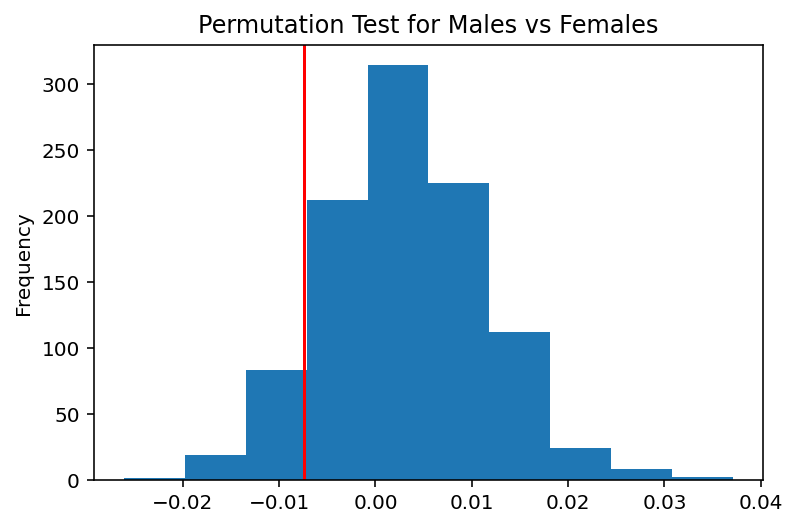

In [206]:
pd.Series(lst).plot(kind = 'hist', title = 'Permutation Test for Males vs Females')
plt.axvline(x = obs, color = 'r')
print("P-value:", (pd.Series(lst) > obs).mean())

#### Conclusion of Fairness Evaluation

We can see from the crosstabs that male has more actual successful complaints than failed complaints, while females have almost an equal number of actual successful to failed complaints. Although this "imbalance" causes us to have more false positives than false negatives in the males' crosstab, it does not prevent us from having a precision that is approximately close to that of the females' prediction precision. Thus, as seen from our permutation test, we can conclude with a p-value of ~0.90 that we cannot reject the null hypothesis and hereby cannot reject the evidence that males and females' success rates are fairly predicted by our model.